<div style="align: center; margin: 0; padding: 0; height: 250px;">
    <br>
    <img src="https://storage.googleapis.com/kaggle-datasets-images/1479517/2444963/1aaa3760e7dd34a87af175482c1514ae/dataset-cover.jpg" style="display:block; margin:auto; width:65%; height:100%;">
</div><br><br>

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>Car Price Dataset</strong></p>  
            
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:22px; font-weight:normal; text-transform: capitalize; padding: 5px;"
     >Machine Learning Engineer Module-4:<br>Car price Dataset Classification and Regression<br><br></p>
    
  <div style="align: center;">
  <table style="text-align: center; background-color: romance; color: Jaguar; border-radius: 10px; font-family: monospace;
                  line-height:1.4; font-size: 21px; font-weight: normal; text-transform: capitalize; padding: 5px; 
                  margin: 0 auto;">
    <tr><td style="text-align: left; padding-left: 0px;"
            > Logistic Regression Model Training <span style="font-size: 16px;"> </span></td></tr>
    <tr><td style="text-align: left; padding-left: 0px;"
            > Logistic Regression Model Evaluation <span style="font-size: 16px;">( ROC AUC, PR AUC, F1, Fbeta)</span></td></tr>
  </table>
  </div>

</div>

**Dataset More Info**

> 

**About Dataset**

<!-- **Context** -->

<!-- **Content** -->


**TASK**

**Homework**

> Note: sometimes your answer doesn't match one of the options exactly. That's fine.

> Select the option that's closest to your solution.

**Dataset**

In this homework, we will use the Car price dataset like last week. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

**Features**

We'll work with the `MSRP` variable, and we'll transform it to a classification task. 

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

**Data preparation**

* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0 
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`


**Submit the results**

- Submit your results here: https://forms.gle/E7Fa3WuBw3HkPQYg6
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used


**Deadline**


The deadline for submitting is October 9 (Monday), 23:00 CET. After that the form will be closed.

Questions: https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/04-evaluation/homework.md

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

> ⚠️ Not Recommended conda `base` env, work on `venv`

- https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf

```
pip freeze > requirements.txt
conda list -e > requirements.txt

# new conda virtual environment
conda create --name "lin-reg" python=3.10 jupyter -y
conda activate "lin-reg"

# install all package dependencies
pip install -r requirements.txt
conda install -c conda-forge --file=requirements.txt      # mostly not work
conda install -c conda-forge pandas==2.0.2 -q -y

# if The environment is inconsistent, try below
conda update -n base -c defaults conda --force-reinstall
conda install anaconda --force-reinstall

```

**You must use the `--no-deps` option in the pip install command in order to avoid bundling dependencies into your conda-package.**

If you run pip install without the `--no-deps` option, pip will often install dependencies in your conda recipe and those dependencies will become part of your package. This wastes space in the package and `increases the risk of file overlap`, file clobbering, and broken packages.

There might be cases where you want to install a package directly from a local directory or a specific location, without relying on the package indexes. In such situations, you can use the `--no-index` option to tell pip not to look for the package in any indexes.

```
- command1 & command2  # runs simultaneously
- command1 ; command2  # runs sequentially
- command1 && command2 # runs sequentially, runs command2 only if command1 succeeds
- command1 || command2 # runs sequentially, runs command2 only if command1 fails
```

In [1]:
!python -V

Python 3.10.12


In [2]:
%%writefile requirements.txt 
# To get started with MLflow you'll need to install the appropriate Python package.

# for parquet file
pyarrow
fastparquet
# orjson is a fast, correct JSON library
orjson
numpy
pandas
matplotlib
seaborn
scipy
tqdm
joblib

# ML Model packages
scikit-learn
xgboost
optuna
hyperopt

# MLOPS experiment-tracking Packages
mlflow
wandb

# MLOPS Orchestration Packages
boto3
prefect
prefect-aws
prefect-email

# MLOPS Monitoring Packages
evidently
psycopg
psycopg[binary]

# Optionally
requests
# for py file parameter
click
# for code style
black

# Optionally
jupyter
ipykernel
ipywidgets
pipenv

Overwriting requirements.txt


In [3]:
# !pip install pyarrow fastparquet orjson pandas matplotlib seaborn tqdm requests scikit-learn xgboost optuna hyperopt
# !pip install mlflow prefect prefect-email boto3 prefect-aws joblib evidently
# !pip install psycopg psycopg[binary] pipenv jupyter ipykernel ipywidgets

In [4]:
import os, sys, platform, IPython.display

# pip install --no-deps --no-index --force-reinstall --no-cache-dir --user
# !{sys.executable} -m pip install -Uq -r requirements.txt --no-cache-dir --user
# !jupyter nbextension enable --py widgetsnbextension

# IPython.display.clear_output()
print("Platform:", platform.system())  # platform.platform()
print("Python  :", platform.python_version())  # sys.version
print("Actv Env:", os.getenv('CONDA_DEFAULT_ENV', 'Not Found Conda Env'))

Platform: Windows
Python  : 3.10.12
Actv Env: lin-reg


In [126]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
# import scipy
# import scipy.stats as stats
# from scipy.sparse import hstack
from scipy.stats import skew, norm, gamma, probplot

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression, TweedieRegressor, LogisticRegression
# from sklearn.linear_model import ElasticNet, Lasso, LassoCV, Ridge, RidgeCV
# from sklearn.svm import LinearSVR
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support, fbeta_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score
# from sklearn.model_selection import GridSearchCV

# import xgboost as xgb
# Hyperparameter Optimization with Tree-structured Parzen Estimator (TPE) algorithm
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
# from hyperopt.pyll import scope
import optuna

import os
import sys
import pickle
import zipfile
# import boto3
# import click
# import pathlib
# import argparse
# import requests
# import urllib.request
from glob import glob
# from tqdm import tqdm           # console-based
# from tqdm.notebook import tqdm  # jupyter-based
from tqdm.auto import tqdm        # automatically selects
# tqdm._instances.clear()
# Import joblib for model persistence
# from joblib import load, dump

# memory management performs garbage collection 
import gc
gc.collect()

54

In [6]:
# Filter out FutureWarnings
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings(action="ignore", message="FutureWarning: is_categorical_dtype*")
warnings.filterwarnings(action="ignore", module="seaborn", category=FutureWarning, message='(is_categorical_dtype is deprecated)')
warnings.filterwarnings(action="ignore", module="seaborn", category=FutureWarning, message='(use_inf_as_na option is deprecated)')
warnings.filterwarnings(action="ignore", module="sklearn", category=FutureWarning, message='(is_sparse is deprecated)')
warnings.filterwarnings(action="ignore", module="xgboost", category=FutureWarning, message='(is_sparse is deprecated)')

In [7]:
# !pip install session_info
import session_info
session_info.show(html=False)

-----
matplotlib          3.8.1
numpy               1.25.2
optuna              3.3.0
pandas              2.1.0
scipy               1.11.3
seaborn             0.13.0
session_info        1.0.0
sklearn             1.2.2
statsmodels         0.14.0
tqdm                4.66.1
-----
IPython             8.12.0
jupyter_client      7.4.9
jupyter_core        5.3.0
jupyterlab          3.6.3
notebook            6.5.4
-----
Python 3.10.12 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 19:09:20) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22621-SP0
-----
Session information updated at 2023-11-05 01:31


In [8]:
import os
# Get the current working directory
# current_dir = os.getcwd()

# Create a new directory for storing data
# os.makedirs('./data', exist_ok=True)
# os.makedirs('./pycode', exist_ok=True)
os.makedirs('./output', exist_ok=True)
os.makedirs('./model', exist_ok=True)

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Recognizing and Understanding Data</strong></h1>   
</div>

### Getting the Dataset 

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

### Ingest Data [wget](https://linuxways.net/centos/linux-wget-command-with-examples/) or [curl](https://daniel.haxx.se/blog/2020/09/10/store-the-curl-output-over-there/)

In [9]:
# Download the data
!curl -Os --create-dirs --output-dir "./data" https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

In [10]:
glob('data/*.*')

['data\\data.csv']

In [11]:
# Read the data
csv_filename = 'data.csv'
csv_filepath = f'data/{csv_filename}'

# Read the CSV file
df = pd.read_csv(csv_filepath, low_memory=False)

In [12]:
print("Shape of DataFrame:", df.shape)
df.head()

Shape of DataFrame: (11914, 16)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Data Exploration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [14]:
# Check for missing values
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [15]:
df.describe(include='O').T

,count,unique,top,freq
Make,11914,48,Chevrolet,1123
Model,11914,915,Silverado 1500,156
Engine Fuel Type,11911,10,regular unleaded,7172
Transmission Type,11914,5,AUTOMATIC,8266
Driven_Wheels,11914,4,front wheel drive,4787
Market Category,8172,71,Crossover,1110
Vehicle Size,11914,3,Compact,4764
Vehicle Style,11914,16,Sedan,3048


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
MSRP,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>3. Exloratory Data Analysis</strong></h1>   
</div>

### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`,
* `MSRP`

### Data Preprocessing:

* Keep only the columns above
* Lowercase the column names and replace spaces with underscores
* Fill the missing values with 0 
* Rename `MSRP` variable to `price`.
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable `above_average`

In [17]:
features = "Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP".split(',')
df = df[features]
df.shape

(11914, 10)

In [18]:
# Rename 'MSRP' variable to 'price'
df = df.rename(columns={'MSRP': 'price'})
df.columns.tolist()

['Make',
 'Model',
 'Year',
 'Engine HP',
 'Engine Cylinders',
 'Transmission Type',
 'Vehicle Style',
 'highway MPG',
 'city mpg',
 'price']

In [19]:
# !pip install skimpy --user
from skimpy import clean_columns
df = clean_columns(df)
df.columns.tolist()

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price']

### Data Cleaning

In [20]:
# Fill missing values in numeric features with 0
df = df.fillna(0)

In [21]:
# Check for missing values
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
price                0
dtype: int64

In [22]:
df.nunique()

make                   48
model                 915
year                   28
engine_hp             357
engine_cylinders        9
transmission_type       5
vehicle_style          16
highway_mpg            59
city_mpg               69
price                6049
dtype: int64

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [23]:
# Create the 'above_average' column with 1 if price > mean, else 0
# df['above_average'] = np.where(df['price'] >= price_mean, 1, 0)
df['above_average'] = (df['price'] > df['price'].mean()).astype(int)
df.columns.tolist()

['make',
 'model',
 'year',
 'engine_hp',
 'engine_cylinders',
 'transmission_type',
 'vehicle_style',
 'highway_mpg',
 'city_mpg',
 'price',
 'above_average']

In [24]:
# Save the data to a CSV file
# df.to_csv('output/df_cleaned.csv', index=False)
# pd.read_csv('output/df_cleaned.csv').info()

### Split the data

* Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. 
* Use `train_test_split` function for that with `random_state=1`
* Make sure that the target value (`above_average`) is not in your dataframe.

In [25]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
SEED = 1
np.random.seed(SEED)

# Step 1: Split the data
# Assuming 'df' is your DataFrame and 'above_average' is the target column
X = df.drop(columns=['above_average', 'price'])  # Features (exclude the target)
y = df['above_average']  # Target variable

# Split the data into train, validation, and test sets (60%/20%/20%)
full_train_df, test_df, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
train_df, val_df, y_train, y_val = train_test_split(full_train_df, y_full_train, test_size=0.25, random_state=SEED)

# Display the shapes of the resulting sets
print("Train set shape:", train_df.shape, y_train.shape)
print("Val set shape  :", val_df.shape, y_val.shape)
print("Test set shape :", test_df.shape, y_test.shape)

assert len(X) == (len(train_df) + len(val_df) + len(test_df))
assert 'above_average' not in train_df.columns
assert 'above_average' not in val_df.columns
assert 'above_average' not in test_df.columns

Train set shape: (7148, 9) (7148,)
Val set shape  : (2383, 9) (2383,)
Test set shape : (2383, 9) (2383,)


### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the `above_average` variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `engine_hp`
- `engine_cylinders`
- `highway_mpg`
- `city_mpg`

In [26]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

roc_scores = {}
for col in train_df.select_dtypes('number').columns:
    auc_ = roc_auc_score(y_train, train_df[col])
    if auc_ < 0.5:
        auc_ = roc_auc_score(y_train, -train_df[col])
    roc_scores[col] = auc_
    print('%16s, %.3f' % (col, auc_))

max_auc_feature = max(roc_scores, key=roc_scores.get)
print(f'The feature with the highest AUC is: {max_auc_feature} with AUC = {roc_scores[max_auc_feature]:.3f}')

            year, 0.688
       engine_hp, 0.917
engine_cylinders, 0.766
     highway_mpg, 0.633
        city_mpg, 0.673
The feature with the highest AUC is: engine_hp with AUC = 0.917


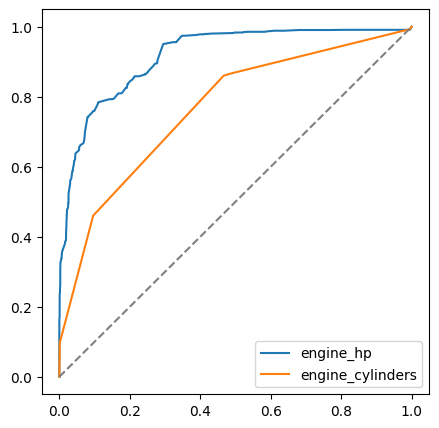

In [27]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, train_df.engine_hp)
plt.plot(fpr, tpr, label='engine_hp')

fpr, tpr, _ = roc_curve(y_train, train_df.engine_cylinders)
plt.plot(fpr, tpr, label='engine_cylinders')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

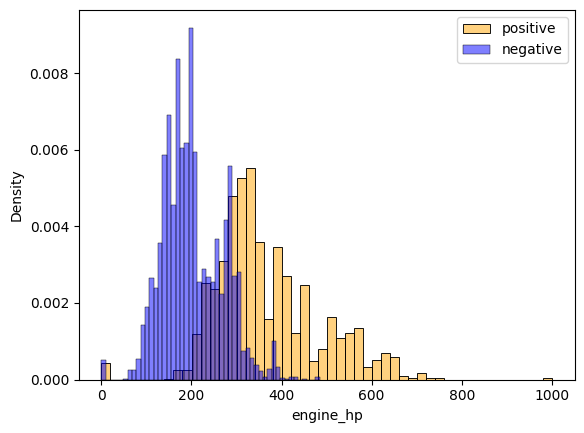

In [28]:
sns.histplot(train_df.engine_hp[y_train == 1], stat='density', bins=50, color='orange', alpha=0.5, label='positive')
sns.histplot(train_df.engine_hp[y_train == 0], stat='density', bins=50, color='blue', alpha=0.5, label='negative')
plt.legend()
plt.show()

# Model Training

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.678
- 0.779
- 0.878
- 0.979

### DictVectorizer

In [29]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import make_column_transformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

def model_builder():
    # Create a preprocessor to handle categorical columns with one-hot encoding
    preprocessor = Pipeline([
        ('to_dict', FunctionTransformer(func=lambda X: X.to_dict(orient='records'))),
        ('dv', DictVectorizer(sparse=True)),
    ])
    # Create a logistic regression model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', C=1.0, max_iter=1000))
    ])
    return model

# Create a model
model = model_builder()

# Fit the model on the training dataset
model.fit(train_df, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('to_dict',
                                  FunctionTransformer(func=<function model_builder.<locals>.<lambda> at 0x000002203D082B00>)),
                                 ('dv', DictVectorizer())])),
                ('classifier',
                 LogisticRegression(max_iter=1000, solver='liblinear'))])

In [30]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Calculate accuracy on the validation dataset
accuracy = accuracy_score(y_val, model.predict(val_df)).round(3)
roc_score = roc_auc_score(y_val, model.predict_proba(val_df)[:, 1]).round(3)

accuracy, roc_score

(0.934, 0.979)

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

In [31]:
def confusion_matrix_dataframe(y_val, y_prob):
    thresholds = np.linspace(0, 1, 101)
    scores = []

    for thr in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predict_positive = (y_prob >= thr)
        predict_negative = (y_prob < thr)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((thr, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores, columns=['threshold', 'tp', 'fp', 'fn', 'tn'])
    return df_scores

y_val_prob = model.predict_proba(val_df)[:, 1]
df_scores = confusion_matrix_dataframe(y_val, y_val_prob)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,654,1729,0,0
10,0.1,644,334,10,1395
20,0.2,623,201,31,1528
30,0.3,605,144,49,1585
40,0.4,590,106,64,1623
50,0.5,570,73,84,1656
60,0.6,550,51,104,1678
70,0.7,506,30,148,1699
80,0.8,464,21,190,1708
90,0.9,376,3,278,1726


In [32]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support, fbeta_score
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score, average_precision_score

def confusion_matrix_dataframe(y_val, y_prob):
    thresholds = np.linspace(0, 1, 101)
    scores = []

    for thr in thresholds:
        y_pred = (y_prob >= thr).astype(int)
        cm = confusion_matrix(y_val, y_pred)
        tn, fp, fn, tp = cm.ravel()
        scores.append((thr, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores, columns=['threshold', 'tp', 'fp', 'fn', 'tn'])
    return df_scores

y_val_prob = model.predict_proba(val_df)[:, 1]
df_scores = confusion_matrix_dataframe(y_val, y_val_prob)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,654,1729,0,0
10,0.1,644,334,10,1395
20,0.2,623,201,31,1528
30,0.3,605,144,49,1585
40,0.4,590,106,64,1623
50,0.5,570,73,84,1656
60,0.6,550,51,104,1678
70,0.7,506,30,148,1699
80,0.8,464,21,190,1708
90,0.9,376,3,278,1726


In [33]:
# Calculate precision (p) and recall (r)
df_scores['p'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fp'])
df_scores['r'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])

# Calculate intersection
df_scores.iloc[[(df_scores['p'].round(2) == df_scores['r'].round(2)).idxmax()]]

,threshold,tp,fp,fn,tn,p,r
47,0.47,575,81,79,1648,0.876524,0.879205


In [34]:
df_scores.iloc[(df_scores['p'].round(2) == df_scores['r'].round(2)).idxmax()].threshold

0.47000000000000003

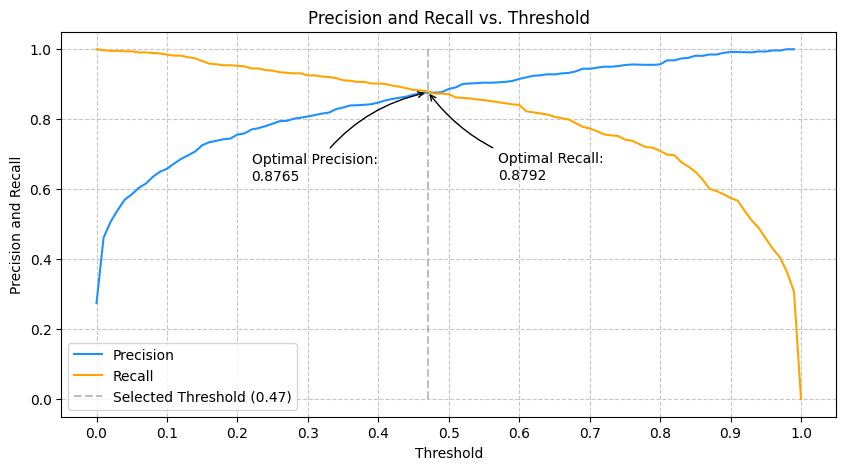

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(df_scores.threshold, df_scores.p, label='Precision', color='dodgerblue')
plt.plot(df_scores.threshold, df_scores.r, label='Recall', color='orange')
plt.vlines(0.47, 0, 1, color='grey', linestyle='--', alpha=0.5, label='Selected Threshold (0.47)')

# Adding labels, title, and legend
plt.xlabel('Threshold')
plt.ylabel('Precision and Recall')
plt.title('Precision and Recall vs. Threshold')
# Customize x-axis ticks
plt.xticks(np.linspace(0, 1, 11))
# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Adding annotations
optimal_threshold = df_scores.iloc[(df_scores['p'].round(2) == df_scores['r'].round(2)).idxmax()].threshold
optimal_precision = df_scores.iloc[(df_scores['p'].round(2) == df_scores['r'].round(2)).idxmax()].p
optimal_recall = df_scores.iloc[(df_scores['p'].round(2) == df_scores['r'].round(2)).idxmax()].r
plt.annotate(
    f'Optimal Precision:\n{optimal_precision:.4f}', 
    xy=(optimal_threshold, optimal_precision), 
    xytext=(optimal_threshold - 0.25, optimal_precision - 0.25),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2')
)
plt.annotate(
    f'Optimal Recall:\n{optimal_recall:.4f}', 
    xy=(optimal_threshold, optimal_recall), 
    xytext=(optimal_threshold + 0.1, optimal_recall - 0.25),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2')
)
plt.show()

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.12
- 0.32
- 0.52
- 0.72

In [37]:
# F1 = 2 * (precision * recall) / (precision + recall)
# Calculate F1 score while avoiding division by zero
# df_scores['f1'] = np.divide((2 * df_scores.p * df_scores.r), (df_scores.p + df_scores.r), out=np.zeros_like(df_scores.p), where=abs(df_scores.p*df_scores.r) > 0)
df_scores['f1'] = np.where(abs(df_scores.p*df_scores.r) > 0, ((2 * df_scores.p * df_scores.r) / (df_scores.p + df_scores.r)), 0)
df_scores[::10]

,threshold,tp,fp,fn,tn,p,r,f1
0,0.0,654,1729,0,0,0.274444,1.000000,0.430688
10,0.1,644,334,10,1395,0.658487,0.984709,0.789216
20,0.2,623,201,31,1528,0.756068,0.952599,0.843031
30,0.3,605,144,49,1585,0.807744,0.925076,0.862438
40,0.4,590,106,64,1623,0.847701,0.902141,0.874074
50,0.5,570,73,84,1656,0.886470,0.871560,0.878951
60,0.6,550,51,104,1678,0.915141,0.840979,0.876494
70,0.7,506,30,148,1699,0.944030,0.773700,0.850420
80,0.8,464,21,190,1708,0.956701,0.709480,0.814750
90,0.9,376,3,278,1726,0.992084,0.574924,0.727977


In [39]:
df_scores.loc[[df_scores.f1.argmax()]]

,threshold,tp,fp,fn,tn,p,r,f1
52,0.52,563,62,91,1667,0.9008,0.860856,0.880375


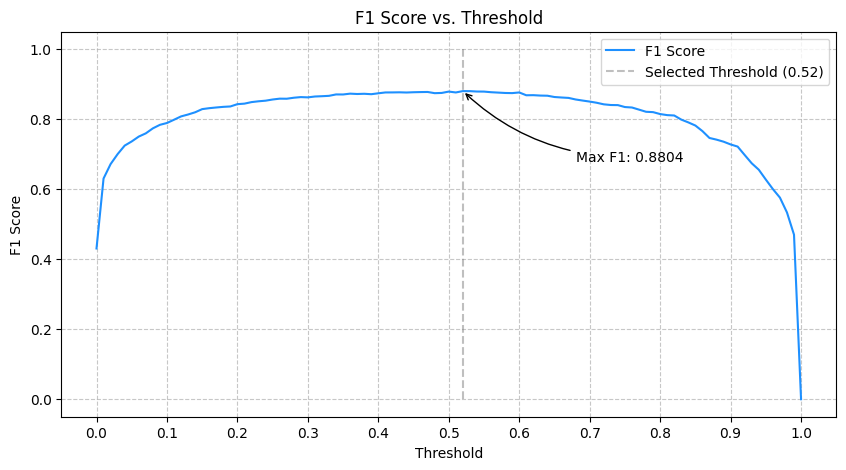

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(df_scores.threshold, df_scores.f1, label='F1 Score', color='dodgerblue')
plt.vlines(0.52, 0, 1, color='grey', linestyle='--', alpha=0.5, label='Selected Threshold (0.52)')

# Adding labels, title, and legend
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
# Customize x-axis ticks
plt.xticks(np.linspace(0, 1, 11))
# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Adding annotations
optimal_threshold = df_scores.loc[df_scores['f1'].idxmax()]['threshold']
max_f1 = df_scores['f1'].max()
plt.annotate(
    f'Max F1: {max_f1:.4f}', 
    xy=(optimal_threshold, max_f1), 
    xytext=(optimal_threshold + 0.16, max_f1 - 0.2),
    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2')
)
plt.show()

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.003
- 0.030
- 0.090
- 0.140

In [120]:
def model_builder(params=dict(C=1.0)):
    # Create a preprocessor to handle categorical columns with one-hot encoding
    preprocessor = Pipeline([
        ('to_dict', FunctionTransformer(func=lambda X: X.to_dict(orient='records'))),
        ('dv', DictVectorizer(sparse=True)),
    ])
    # Create a logistic regression model
    model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, **params))
    ])
    return model

def model_trainer(X_train, y_train, params=dict(C=1.0)):
    # Create a model
    model = model_builder(params=params)
    # Fit the model on the training dataset
    model.fit(X_train, y_train)    
    return model

def predict_proba(X_val, model):
    prob = model.predict_proba(X_val)[:, 1]
    return prob

In [121]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1)
scores = []

for train_idx, val_idx in kfold.split(full_train_df):
    X_train, X_val = full_train_df.iloc[train_idx], full_train_df.iloc[val_idx]
    y_train, y_val = y_full_train.iloc[train_idx], y_full_train.iloc[val_idx]

    model = model_trainer(X_train, y_train)
    auc = roc_auc_score(y_val, predict_proba(X_val, model))
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.979 +- 0.003


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.01, 0.1, 0.5, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.01
- 0.1
- 0.5
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.

In [122]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 0.5, 10]:
    scores = {}
    # scores[C] = []
    for train_idx, val_idx in kfold.split(full_train_df):
        X_train, X_val = full_train_df.iloc[train_idx], full_train_df.iloc[val_idx]
        y_train, y_val = y_full_train.iloc[train_idx], y_full_train.iloc[val_idx]

        model = model_trainer(X_train, y_train, params=dict(C=C))
        auc_ = roc_auc_score(y_val, predict_proba(X_val, model))
        scores[C] = scores.get(C, []) + [auc_]

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(list(scores.values())), np.std(list(scores.values()))))


print(f'`C`: {max(scores, key=scores.get)} is leads to the `best mean score`: {np.mean(scores[max(scores, key=scores.get)]):.3f}.')

C=0.01, 0.952 +- 0.002
C= 0.1, 0.972 +- 0.002
C= 0.5, 0.978 +- 0.001
C=  10, 0.983 +- 0.003
`C`: 10 is leads to the `best mean score`: 0.983.


### Optuna

In [123]:
def objective(trial):
    # Define hyperparameters to optimize
    params = {
        # 'C'         : trial.suggest_float(name='C', low=1e-2, high=1e2, step=None, log=False),
        'C'           : trial.suggest_categorical(name='C', choices=[0.01, 0.1, 0.5, 10]),
    }
    # Create a k-fold cross-validator
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(full_train_df, y_full_train):
        X_train, X_val = full_train_df.iloc[train_idx], full_train_df.iloc[val_idx]
        y_train, y_val = y_full_train.iloc[train_idx], y_full_train.iloc[val_idx]

        # Create and train the model with the current hyperparameters
        model = model_builder(params=params)
        model.fit(X_train, y_train)

        # Make predictions and calculate the metric (e.g., mean squared error)
        auc_ = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
        scores.append(auc_)

    # Return the average mean squared error as the objective
    return np.mean(scores)

In [124]:
# Set the number of trials for optimization
num_trials=10

def optimize_hyperparameters(num_trials):
    # Configure the sampler and create a study
    sampler = optuna.samplers.TPESampler(seed=SEED)
    study = optuna.create_study(direction="maximize", sampler=sampler)

    # Optimize the study
    study.optimize(objective, n_trials=num_trials, show_progress_bar=True)    
    return study

study = optimize_hyperparameters(num_trials)

[I 2023-11-05 02:32:24,152] A new study created in memory with name: no-name-40bade8d-88ff-41e5-814f-5f50a88be3bf


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2023-11-05 02:32:25,952] Trial 0 finished with value: 0.9717992029191439 and parameters: {'C': 0.1}. Best is trial 0 with value: 0.9717992029191439.
[I 2023-11-05 02:32:27,781] Trial 1 finished with value: 0.982854275209424 and parameters: {'C': 10}. Best is trial 1 with value: 0.982854275209424.
[I 2023-11-05 02:32:29,537] Trial 2 finished with value: 0.982854275209424 and parameters: {'C': 10}. Best is trial 1 with value: 0.982854275209424.
[I 2023-11-05 02:32:31,163] Trial 3 finished with value: 0.9717992029191439 and parameters: {'C': 0.1}. Best is trial 1 with value: 0.982854275209424.
[I 2023-11-05 02:32:32,745] Trial 4 finished with value: 0.9717992029191439 and parameters: {'C': 0.1}. Best is trial 1 with value: 0.982854275209424.
[I 2023-11-05 02:32:34,421] Trial 5 finished with value: 0.9717992029191439 and parameters: {'C': 0.1}. Best is trial 1 with value: 0.982854275209424.
[I 2023-11-05 02:32:36,114] Trial 6 finished with value: 0.9717992029191439 and parameters: {'C':

In [125]:
# Get the best trial and its parameters
best_trial = study.best_trial
best_params = best_trial.params
best_value = best_trial.value
print(f"Best Parameters: {best_params}")
print(f"Best RMSE Value: {best_value:.3f}")

Best Parameters: {'C': 10}
Best RMSE Value: 0.983


## End of Project